In [3]:
import pandas as pd
import numpy as np

In [4]:
input_path = "data/titanic_raw.csv"
df = pd.read_csv(input_path)

In [5]:
print("Shape (row, column):",df.shape)
df.head(5)

Shape (row, column): (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing Count: " ,missing_counts)

Missing Count:  Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [11]:
missing_percent = (df.isna().mean() * 100).sort_values(ascending=False)
print("Missing Value % : ", missing_percent)

Missing Value % :  Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


In [13]:
dupes = df.duplicated().sum()
print("Duplicate Rows: " , dupes)

Duplicate Rows:  0


In [14]:
df = df.drop_duplicates().reset_index(drop=True)
print("After removing duplicates, shape:", df.shape)

After removing duplicates, shape: (891, 12)


In [15]:
#Looking for text column
text_cols = df.select_dtypes(include=["object"]).columns

In [16]:
for col in text_cols:
    df[col] = df[col].astype("string").str.strip()

In [17]:
if "Sex" in df.columns:
    df["Sex"] = df["Sex"].str.lower()

In [18]:
if "Ticket" in df.columns:
    df["Ticket"] = df["Ticket"].str.upper()

In [19]:
#Calculating the ration in percent of the missing values
missing_ratio = df.isna().mean() * 100


In [20]:
#Dropping column with above ratio 60% missing value
drop_cols = missing_ratio[missing_ratio > 60].index
df = df.drop(columns=drop_cols)

In [21]:
print("Dropped columns (missing > 60%):", list(drop_cols))


Dropped columns (missing > 60%): ['Cabin']


In [22]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [23]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    mode_val = df[col].mode(dropna=True)
    fill_value = mode_val[0] if len(mode_val) > 0 else "Unknown"
    df[col] = df[col].fillna(fill_value)

In [24]:
print("Missing after cleaning:\n", df.isna().sum().sort_values(ascending=False))
print("Final shape:", df.shape)

Missing after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Final shape: (891, 11)


In [25]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Saved: titanic_cleaned.csv")


Saved: titanic_cleaned.csv


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("titanic_cleaned.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns)

print("\nInfo:")
df.info()


Shape (rows, cols): (891, 11)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().mean() * 100).sort_values(ascending=False)

print("Missing count:\n", missing_count[missing_count > 0])
print("\nMissing percent (%):\n", missing_percent[missing_percent > 0])


Missing count:
 Series([], dtype: int64)

Missing percent (%):
 Series([], dtype: float64)


In [30]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
stats_table = pd.DataFrame({
    "mean": df[num_cols].mean(),
    "median": df[num_cols].median(),
    "min": df[num_cols].min(),
    "max": df[num_cols].max()
}).sort_values(by="mean", ascending=False)

stats_table


,mean,median,min,max
PassengerId,446.000000,446.0000,1.00,891.0000
Fare,32.204208,14.4542,0.00,512.3292
Age,29.361582,28.0000,0.42,80.0000
Pclass,2.308642,3.0000,1.00,3.0000
SibSp,0.523008,0.0000,0.00,8.0000
Survived,0.383838,0.0000,0.00,1.0000
Parch,0.381594,0.0000,0.00,6.0000


In [32]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    print("\n---", col, "---")
    print(df[col].value_counts().head(10))



--- Name ---
Name
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: count, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Ticket ---
Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

--- Embarked ---
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [33]:
outlier_report = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_report[col] = len(outliers)

outlier_report = pd.Series(outlier_report).sort_values(ascending=False)
outlier_report


Parch          213
Fare           116
Age             66
SibSp           46
PassengerId      0
Survived         0
Pclass           0
dtype: int64

In [34]:
corr = df[num_cols].corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


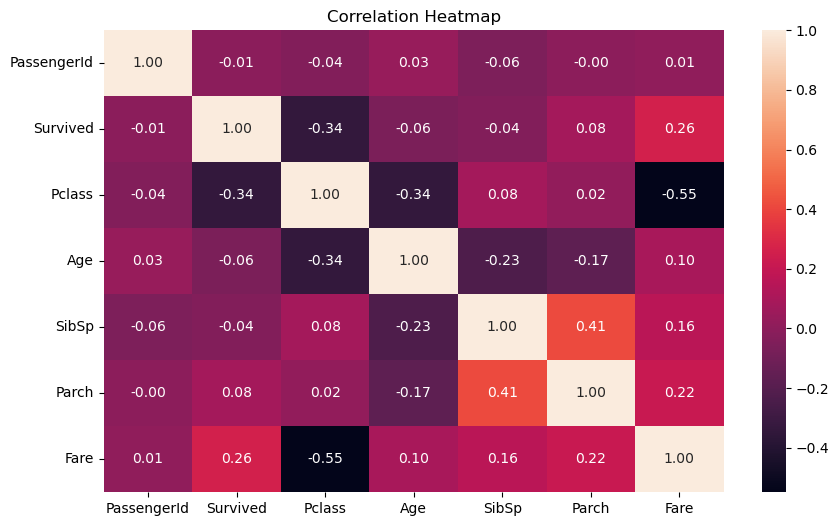

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


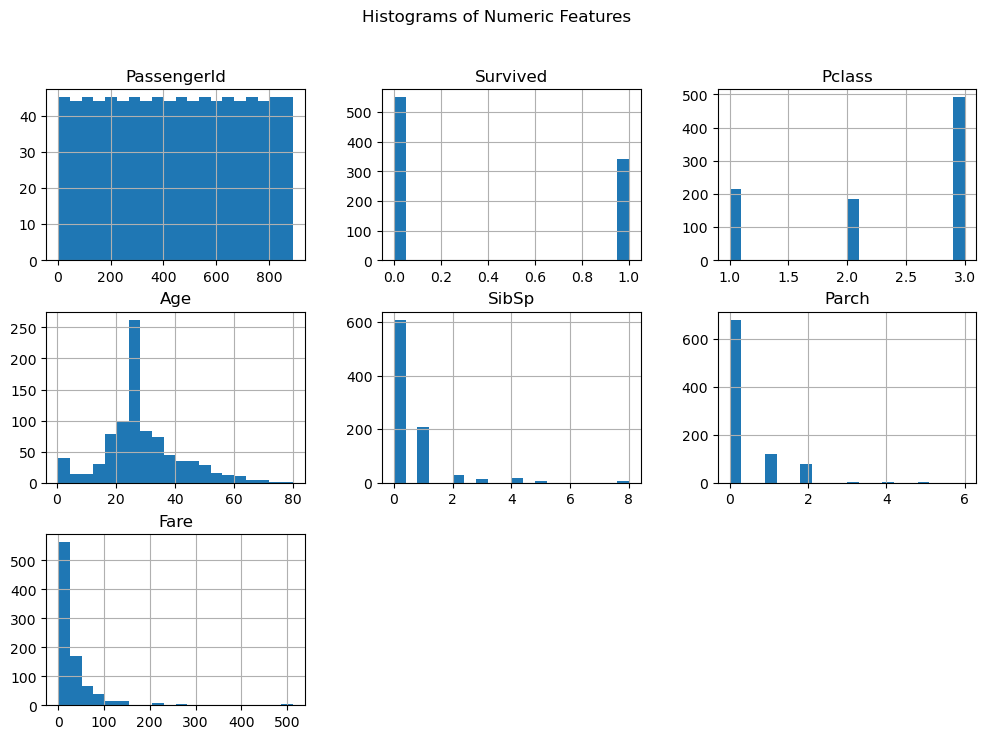

In [36]:
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [43]:
cols_lower = [c.lower() for c in df.columns]
print("sex in df?", "sex" in cols_lower)
print("survived in df?", "survived" in cols_lower)
print("age in df?", "age" in cols_lower)


sex in df? True
survived in df? True
age in df? True


In [45]:
def colname(df, target):
    """Find actual column name in df matching target ignoring case."""
    for c in df.columns:
        if c.lower() == target.lower():
            return c
    return None

sex_col = colname(df, "sex")
surv_col = colname(df, "survived")
age_col = colname(df, "age")

print("Detected columns:")
print("sex_col =", sex_col)
print("surv_col =", surv_col)
print("age_col =", age_col)


Detected columns:
sex_col = Sex
surv_col = Survived
age_col = Age


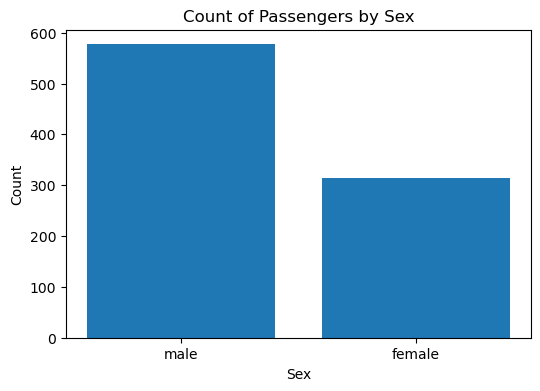

In [46]:
if sex_col is None:
    print("❌ 'sex' column not found in your dataset.")
else:
    counts = df[sex_col].value_counts(dropna=False)
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title("Count of Passengers by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Count")
    plt.show()


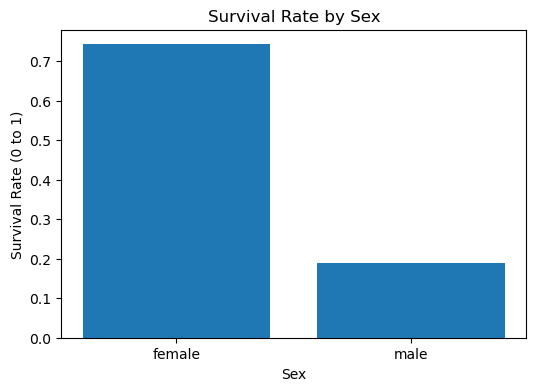

In [47]:
if sex_col is None or surv_col is None:
    print("❌ Required columns not found (need sex + survived).")
else:
    # Ensure survived is numeric (0/1)
    df[surv_col] = pd.to_numeric(df[surv_col], errors="coerce")
    
    survival_by_sex = df.groupby(sex_col)[surv_col].mean().sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    plt.bar(survival_by_sex.index.astype(str), survival_by_sex.values)
    plt.title("Survival Rate by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Survival Rate (0 to 1)")
    plt.show()

    survival_by_sex


C:\Users\DELL\AppData\Local\Temp\ipykernel_4944\2856615623.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agebin = temp.groupby("age_bin")[surv_col].mean()


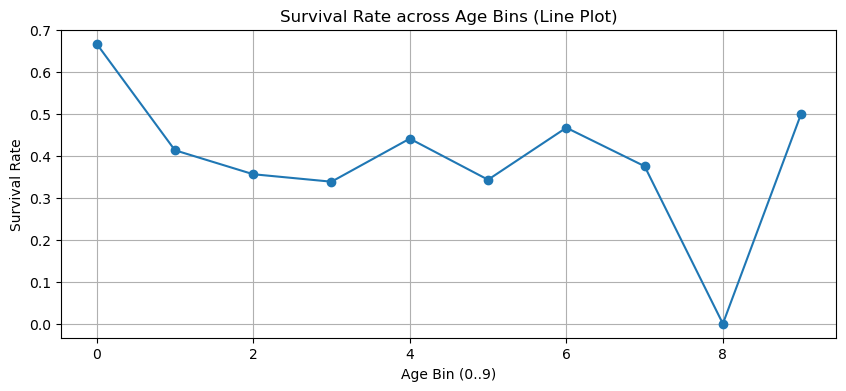

In [48]:
if age_col is None or surv_col is None:
    print("❌ Required columns not found (need age + survived).")
else:
    df[surv_col] = pd.to_numeric(df[surv_col], errors="coerce")
    df[age_col] = pd.to_numeric(df[age_col], errors="coerce")

    # Drop rows where age or survived missing (line plot needs numbers)
    temp = df[[age_col, surv_col]].dropna()

    temp["age_bin"] = pd.cut(temp[age_col], bins=10)
    survival_by_agebin = temp.groupby("age_bin")[surv_col].mean()

    plt.figure(figsize=(10,4))
    plt.plot(range(len(survival_by_agebin)), survival_by_agebin.values, marker="o")
    plt.title("Survival Rate across Age Bins (Line Plot)")
    plt.xlabel("Age Bin (0..9)")
    plt.ylabel("Survival Rate")
    plt.grid(True)
    plt.show()

    survival_by_agebin


In [49]:
df.shape


(891, 11)